# Introducción a los algoritmos de redes neuronales

## Especificación de una red neuronal

1. **Arquitectura**: definición de la red neuronal y de su topología, dada normalmente por un [grafo dirigido](https://en.wikipedia.org/wiki/Directed_graph) con pesos. A cada neurona (nodo) se le asigna una o más variables (la _actividad_), y las conexiones/interacciones neuronales se modelan por las aristas pesadas del grafo.
2. **Regla de actividad**: definición de la forma en que cambian las actividades neuronales en el tiempo, tomando en cuenta sus interacciones (es decir: una dinámica).
3. **Regla de aprendizaje**: definición de la forma en que las interacciones neuronales cambian en el tiempo, tomando en cuenta la actividad neuronal.

> **Nota**: normalmente la escala temporal de la regla de actividad es menor que la de la regla de aprendizaje.

## Red de McCulloc-Pitts

Una red neuronal de McCulloch-Pitts se modela como:

1. Un vector $\mathbf{S}\subseteq\{-1,1\}^N$ (con $N\in\mathbb{N}$, $N\geq 1$ fijo) de _actividad neuronal_.
> $S_j=\pm 1$ indica que la $i-$ésima neurona está activa o pasiva.
2. Una matriz $\mathbf{J}=(J_{ij})\in\mathbb{R}^{N\times N}$ de _acoplamientos sinápticos_ (también llamada _matriz sináptica_).
3. La dinámica:
$$S_i(t+1)=\mathrm{sign}\left(\sum_{j}J_{ij}S_j(t)-\theta_i\right)$$ 
donde $\theta_i$ es un _umbral de activación_ específico de cada neurona $i$. En este caso, $t\in\mathbb{N}$ con $\mathbf{S}(0)$ fijado de antemano.
> La idea es que una neurona _suma_ la actividad entrante de todas las demás neuronas, ponderada por las fuerzas de acoplamiento sináptico correspondientes, para obtener el potencial postsináptico. Éste luego se compara con un umbral específico de cada neurona: si el potencial postsináptico supera el umbral, la neurona estará activa en el siguiente paso temporal; en caso contrario, será pasiva.
4. La función:
$$\mathcal{H}\left(\mathbf{S}\right)=-\sum_{i,j} J_{ij} S_i S_j$$
> Cuando $\mathbf{J}$ es simétrica, la función $\mathcal{H}$ está acotada inferiormente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Perceptron:
    def __init__(self, S, J, threshold):
        assert len(S)==len(J)==len(threshold) and J.shape==(N,N)
        self.nodes = S
        self.size = len(S)
        self.couplings = J
        self.threshold = threshold
        self.energy = [-self.nodes.dot(self.couplings.dot(self.nodes))]

    def evolve(self,t):
        assert t>=0 and type(t)==int
        t_f=0
        while t_f < t:
            self.nodes=np.sign(
                self.couplings.dot(self.nodes)-self.threshold
            )
            self.energy.append(
                -self.nodes.dot(self.couplings.dot(self.nodes))
            )
            t_f+=1

Definimos interacciones simétricas y un umbral nulo:

In [29]:
N=5
J0=np.random.normal(size=(N,N))
J0=(J0+J0.T)/2
S0=np.random.choice(
    [-1.,1.],
    size=N
)
threshold=np.zeros(N) #Puede ser: threshold=np.random.normal(size=N)

x = Perceptron(S0,J0,threshold)

In [30]:
x.nodes

array([-1., -1.,  1., -1.,  1.])

In [31]:
x.couplings

array([[ 0.98520708,  0.26113478, -0.95398149, -0.12257658,  1.18889688],
       [ 0.26113478,  0.08755125, -1.24456871,  0.11805388, -0.06665334],
       [-0.95398149, -1.24456871, -0.16812018, -0.73698624, -0.50346358],
       [-0.12257658,  0.11805388, -0.73698624, -0.16578829,  1.48146929],
       [ 1.18889688, -0.06665334, -0.50346358,  1.48146929,  0.50639942]])

In [32]:
x.evolve(1)
x.nodes

array([-1., -1.,  1.,  1., -1.])

In [33]:
x.energy

[-1.4151934676859983, -4.9881678232267355]

In [34]:
x.evolve(20)

In [35]:
x.energy

[-1.4151934676859983,
 -4.9881678232267355,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044,
 -13.84389913507044]

Text(0.5, 0, '$j$')

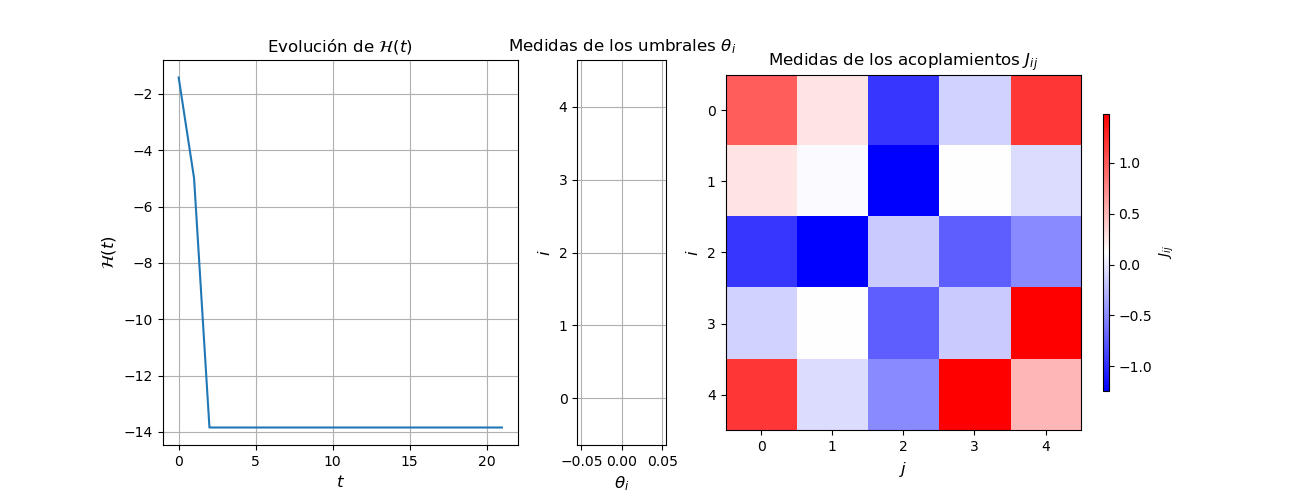

In [36]:
%matplotlib widget
fig,ax=plt.subplots(
    1,3,
    figsize=(13,5),
    width_ratios=[4,1,5]
)
ax[0].plot(x.energy)
ax[0].set_title('Evolución de $\mathcal{H}(t)$')
ax[0].set_ylabel('$\mathcal{H}(t)$',fontsize=12)
ax[0].set_xlabel('$t$',fontsize=12)
ax[0].grid()

ax[1].barh(range(x.size),x.threshold)
ax[1].set_title('Medidas de los umbrales $\\theta_{i}$')
ax[1].set_ylabel('$i$',fontsize=12)
ax[1].set_xlabel('$\\theta_i$',fontsize=12)
ax[1].grid()

im=ax[2].imshow(x.couplings,cmap='bwr')
plt.colorbar(
    im,ax=ax[2],
    shrink=0.72,
    aspect=50,
    label='$J_{ij}$'
)
ax[2].set_title('Medidas de los acoplamientos $J_{ij}$')
ax[2].set_ylabel('$i$',fontsize=12)
ax[2].set_xlabel('$j$',fontsize=12)

Ahora compararemos el estado inicial con el (los) final(es):

In [37]:
def normalizeEdgeColor(J):
    return (J-J.min())/(J.max()-J.min()+1e-6)

In [38]:
J0norm=normalizeEdgeColor(J0)

G0 = nx.Graph(
    {i: {j: {"weight": J0norm[i,j]} for j in range(N)} for i in range(N)}
)
nx.set_node_attributes(G0, {i:{'activity':S0[i]} for i in range(N)})

In [39]:
G0.edges.data('weight')

EdgeDataView([(0, 0, 0.8179544725869231), (0, 1, 0.5523411395729274), (0, 2, 0.10659687094087389), (0, 3, 0.41158330160002493), (0, 4, 0.8926745334972543), (1, 1, 0.4886650408267915), (1, 2, 0.0), (1, 3, 0.49985440173806367), (1, 4, 0.43209777148538947), (2, 2, 0.39487642348232993), (2, 3, 0.18619780299560426), (2, 4, 0.2718615280325885), (3, 3, 0.39573183840856074), (3, 4, 0.9999996331673905), (4, 4, 0.6423122081577417)])

In [40]:
Jnorm=normalizeEdgeColor(x.couplings)

G = nx.Graph(
    {i: {j: {"weight": Jnorm[i,j]} for j in range(N)} for i in range(N)}
)
nx.set_node_attributes(G, {i:{'activity':x.nodes[i]} for i in range(N)})

In [41]:
G.nodes.data('activity')

NodeDataView({0: -1.0, 1: -1.0, 2: 1.0, 3: -1.0, 4: -1.0}, data='activity')

In [42]:
G.edges.data('weight')

EdgeDataView([(0, 0, 0.8179544725869231), (0, 1, 0.5523411395729274), (0, 2, 0.10659687094087389), (0, 3, 0.41158330160002493), (0, 4, 0.8926745334972543), (1, 1, 0.4886650408267915), (1, 2, 0.0), (1, 3, 0.49985440173806367), (1, 4, 0.43209777148538947), (2, 2, 0.39487642348232993), (2, 3, 0.18619780299560426), (2, 4, 0.2718615280325885), (3, 3, 0.39573183840856074), (3, 4, 0.9999996331673905), (4, 4, 0.6423122081577417)])

In [43]:
G0.nodes.data('activity')

NodeDataView({0: -1.0, 1: -1.0, 2: 1.0, 3: -1.0, 4: 1.0}, data='activity')

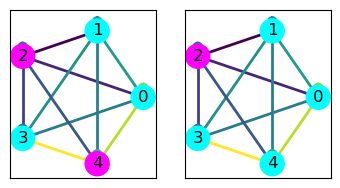

In [49]:
%matplotlib inline

colorMap='cool'

subax1 = plt.subplot(231)
nx.draw_networkx(
    G0, 
    pos=nx.circular_layout(G0), 
    node_color=[v for u,v in G0.nodes.data('activity')],
    cmap=colorMap, 
    vmin=-1,vmax=1,
    #edgelist=G0.edges,
    width=2,
    edge_color=[w for u,v,w in G0.edges.data('weight')],
    #edge_color=G0.edges.data('weight'),
    edge_vmin=0,edge_vmax=1,
    #edge_cmap='viridis',
    with_labels=True
)

subax2 = plt.subplot(232)
nx.draw_networkx(
    G, 
    pos=nx.circular_layout(G),
    node_color=[v for u,v in G.nodes.data('activity')],
    cmap=colorMap,
    vmin=-1,vmax=1, 
    #edgelist=G.edges,
    width=2,
    edge_color=[w for u,v,w in G.edges.data('weight')],
    edge_vmin=0,edge_vmax=1,
    #edge_cmap='viridis',
    with_labels=True)

plt.show()

## Perceptrón

Un tipo especial de red neuronal es la _feed-forward_: las neuronas pueden arreglarse en capas $l=1,\dots,L$ de tal modo que una neurona en la capa:

1. $l=1$ (_capa de entrada_): sólo _alimenta_ a las neuronas de la capa $l+1$;
2. $l\in \{2,\dots,L-1\}$ (_capas ocultas_): sólo _alimenta_ a las neuronas de la capa $l+1$, y recibe la entrada de las neuronas de la capa $l-1$;
3. $l=L$ (_capa de salida_): sólo recibe la entrada de las neuronas de la capa $l-1$.

El perceptrón es una red neuronal _feed-forward_ con $L=2$ (es decir: sin capas ocultas):

$$\sigma=\mathrm{sign}\left(\sum_{i} J_i S_i\right)$$

### Clasificación de números

Si $\mathbf{S}=\left(S_1,\dots,S_{2N}\right)$ representa un par de números enteros de $N$ bits:

- $(S_1,\dots,S_N)\sim n_1=\sum_{i=1}^N 2^{N-i} \left(\frac{S_{i}+1}{2}\right)$;
- $(S_{N+1},\dots,S_{2N})\sim n_2=\sum_{i=1}^N 2^{N-i}  \left(\frac{S_{N+i}+1}{2}\right)$;

entonces los acoplamientos $\mathbf{J}^*=(J_1^*,\dots,J_N^*)$ dados por:

- $ J_i^*=2^{N-1}$ para $i=1,\dots,N$;
- $J_i^*=-J_{i-N}^*$ para $i=N+1,\dots,2N$;

son tales que:

- $\sigma=-1$ si $n_1<n_2$
- $\sigma=+1$ si $n_1>n_2$

Sin embargo, puede definirse una dinámica $\mathbf{J}(t+1)=f(\mathbf{J}(t))$ tal que, mediante _ejemplos_, haga que un estado aleatorio inicial $\mathbf{J}(0)$ converja a $\mathbf{J}^*$.

### Esquema de aprendizaje del clasificador de números

1. Un conjunto de $p$ vectores de entrada $\{\mathbf{\xi}^{\mu}\}_{\mu=1}^p$. Para cada $\mathbf{\xi}^{\mu}$, _se sabe de antemano la salida correcta_ $\sigma_T^{\mu}$. A la colección $\{(\mathbf{\xi}^{\mu},\sigma_T^{\mu})\}_{\mu=1}^p$ se le llama _conjunto de entrenamiento_ o _de ejemplos_.
> **Notas**: 
> - El subíndice $T$ viene de _target_.
> - Las entradas y salidas $\{(\mathbf{\xi}^{\mu},\sigma_T^{\mu})\}_{\mu=1}^p$ se asocian, por conveniencia, a una red _feed-forward_ objetivo con acoplamientos $\mathbf{T}$. En este caso, $\mathbf{T}$ proviende de _target_ y _teacher_. La arquitectura de $\mathbf{T}$ no es necesariamente la misma que la de $\mathbf{J}$, salvo en el número de entradas y salidas.
2. La _regla de aprendizaje_ que adapta $\mathbf{J}$ (incluyendo posiblemente elementos aleatorios) a los ejemplos $\{(\mathbf{\xi}^{\mu},\sigma_T^{\mu})\}_{\mu=1}^p$.
3. El _error de entrenamiento_:
$$\varepsilon_t\left(\mathbf{J};\{\mathbf{\xi}^{\mu}\},\mathbf{T}\right)=\frac{1}{p}\sum_{\mu=1}^p\mathrm{d}\left(\mathbf{J};\mathbf{\xi}^{\mu},\mathbf{T}\right)$$
donde $\mathrm{d}\left(\mathbf{J};\mathbf{S},\mathbf{T}\right)$ mide la disimilaridad (distancia) entre las salidas de $\mathbf{S}$ bajo $\mathbf{J}$ y $\mathbf{T}$.
> **Notas**:
> 1. Algunas distancias $\mathrm{d}\left(\mathbf{J};\mathbf{S},\mathbf{T}\right)$ son:
>   - $\mathrm{d}\left(\mathbf{J};\mathbf{S},\mathbf{T}\right)=\theta(-\sigma_t \sigma)$
>   - $\mathrm{d}\left(\mathbf{J};\mathbf{S},\mathbf{T}\right)=(\sigma_T-\sigma)^2/4$
> 2. Para determinar _qué tan bien se aproxima $\mathbf{J}$ a $\mathbf{T}$_, se define el _error de aproximación_ mediante el valor esperado de $\mathrm{d}\left(\mathbf{J};\mathbf{S},\mathbf{T}\right)$:
> $$\varepsilon\left(\mathbf{J};\mathbf{T}\right)=\sum_{\mathbf{S}\in\{-1,1\}^N} P(\mathbf{S}) \mathrm{d}\left(\mathbf{J};\mathbf{S},\mathbf{T}\right)$$
donde $P(\mathbf{S})$ es una distribución de ejemplos (entradas) de entrenamiento. Esto implica que el error de entrenamiento $\varepsilon_t$ es un estimador del error de generalización $\varepsilon$.
> 3. En física estadística se considera principalmente el escenario especial de una red neuronal de profesor y una red neuronal alumno, y su objetivo es producir resultados exactos para el comportamiento típico (límite termodinámico; mediana=media; varianza nula: auto promediación) de aprendizaje, en el que tanto el número de acoplamientos de la red del alumno $N$ y el número de ejemplos del conjunto de entrenamiento $p$ divergen, manteniendo una razón constante $\alpha$: $p=\alpha N$.

In [201]:
def binaryForm(n,n_bits):
    assert type(n) in {int,np.int_} and n<2**n_bits
    s=np.base_repr(n,2)
    if n>=2**(n_bits-1):
        t=list(s)
    else:
        t=list('0'*(n_bits-len(s))+s)
    return np.array([2*int(i)-1 for i in list(t)])

def naturalForm(x):
    assert type(x)==np.ndarray
    n=len(x)
    return int(sum([(x[i]+1)*2**(n-i-2) for i in range(n)]))

def trueFalseBin(x):
    assert all([type(q)==np.bool_ for q in x])
    return np.array([1 if q else -1 for q in x])

In [133]:
binaryForm(13,4)

array([ 1,  1, -1,  1])

In [134]:
binaryForm(13,5)

array([-1,  1,  1, -1,  1])

In [136]:
naturalForm(np.array([-1,-1,1,1,-1,1]))

13

La cantidad de posibles entradas $\mathbf{S}\in\{-1,1\}^{2N}$ es $2^{2N}\approx10^{3N/5}$.

> **Ejemplo**: las posibles comparaciones entre dos números de $N=10$ bits son $1048576\approx 10^6$.

Definir el conjunto de entrenamiento:

In [140]:
p=1000 #número de ejemplos
Nbits=10 #cantidad de bits en los números por comparar
rng = np.random.default_rng()

Los dos primeros pares de números son:

In [168]:
Xi=rng.integers(2**Nbits, size=(p,2))
Xi[0:2]

array([[282, 842],
       [707, 167]])

Y la comparación entre ellos es:

In [169]:
sigma_T=np.array([xi[0] < xi[1] for xi in Xi])
sigma_T[0:2]

array([ True, False])

Juntamos ambos arreglos en forma canónica:

In [208]:
trainingSet=[
    (np.concatenate(tuple(binaryForm(x0,Nbits) for x0 in x)),y) for x,y in zip(Xi,trueFalseBin(sigma_T))
]

El primer ejemplo $(\mathbf{\xi}^1,\sigma^1_T)$ es:

In [220]:
print('Xi[0]={},\n sigma_T[0]={}'.format(*trainingSet[0]))

Xi[0]=[-1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1],
 sigma_T[0]=1


## Referencias 

- P. Peretto. **An introduction to the modeling of neural networks**.
   - Capítulo 3.
- A. Engel; C. Van den Browck. **Statistical mechanics of learning**.
   - Capítulos 1 y 2.
- D. J. MacKay. **Information theory, inference, and learning algorithms**.
   - Capítulo 5, secciones 38 a 40.